<a href="https://colab.research.google.com/github/KhuyenLE-maths/Alexnet_model_with_image_classification/blob/main/Alexnet_and_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Architechture
The architecture of Alexnet is described in the following figure [1]:

In the first layer, a convolutional window of size 11 × 11 is used. It is because of input size is large, so we need to use a large kernel to capture the object. The convolutional window shape in the next layers is reduced gradually to 5× 5 and 3 × 3, but the number of filters is increased in parallel. The two first and the last convolutional layers are followed by max-pooling layers, where a pooling window size of 3 × 3 and a stride of 2 steps are applied. Hence, the output size is halved through these layers. 

In this model, the ReLU activation function was applied [1]. You can see my previous post for more detail about this function. Besides, the authors also used some techniques to reduce overfitting phenomena, such as data augmentation and dropout. For more detail, the dropout technique was applied in the two first fully connected layers with a dropping ratio is 50%.

Implementation of Alexnet model on Keras:

In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# import metric
from keras.metrics import categorical_crossentropy
# optimization method 
from keras.optimizers import SGD
from Capsule_Keras import *

In [44]:
def Alexnet():
  # Initialize the model
  model = Sequential()

  # layer 1: convolutional layer + max-pooling layer
  model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', activation='relu', input_shape = (227,227,3)))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layer 2: convolutional layer + max-pooling layer 
  model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 3-5: three convolutional layers + 1 max-pooling layer
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 6 - 8: two fully connected hidden layers and one fully connected output layer
  model.add(Flatten())
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation = 'softmax'))

  # compile the model with a loss funciton, a metric and and optimizer method for estimating the loss function
  opt = SGD(lr = 0.1)
  model.compile(loss = categorical_crossentropy,
                optimizer = opt,
                metrics = ['accuracy'])

  return model

In [45]:
Alexnet_model = Alexnet()

c:\Users\Dr. Rajendra Ku Roul\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [46]:
Alexnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 384)       885120    
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 384)      

***This model has more than 62 millions parameters.***

## II. Application Alexnet model to dog and cat classification
The dataset is collected from Kaggle, this data consists of a training set and a test set: 
- Training set includes 4006 images of dogs and 4001 images of cats.
- Testing set includes 1013 images of dog and 1012 images of cats. 


### 1. Data loading and exploration

In [47]:
import os
train_path = os.getcwd() + '/' + 'Dehazed_Images_3400/Dehazed_Images/train/' 
test_path = os.getcwd() + '/' + 'Dehazed_Images_3400/Dehazed_Images/test/'

In [48]:
print('The training set consists of ', len(os.listdir(train_path + 'busy/')), ' busy patches and ', len(os.listdir(train_path + 'free/')), ' Free patches.' )

The training set consists of  1900  busy patches and  1500  Free patches.


In [49]:
print('The test set consists of ', len(os.listdir(test_path + 'busy/')), ' busy patches and ', len(os.listdir(test_path + 'free/')), ' free patches.' )

The test set consists of  772  busy patches and  295  free patches.


Load images and labels 

In [50]:
import cv2
from PIL import Image
import numpy as np

In [51]:
cates = ['busy', 'free']
def load_images_and_labels(data_path, cates): 
  X = []
  y = []
  i = 0
  for index, cate in enumerate(cates): 
    for img_name in os.listdir(data_path + cate + '/'):
      i = i +1
      #print(i)
      img = cv2.imread(data_path + cate + '/' + img_name)
      if img is not None: 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB')
        # resize image to 227x227 which is the required input size of the Alexnet model
        img_rs = img_array.resize((227,227))
        # convert the image to array
        img_rs = np.array(img_rs)
      
        X.append(img_rs)
        y.append(index)
  return X, y

Load the training data 

In [52]:
X_train, y_train = load_images_and_labels(train_path, cates)


In [ ]:

#print(y_train)
#Load the test set

In [53]:
X_test, y_test = load_images_and_labels(test_path, cates)

In [54]:
print('Training size: ', len(X_train), 'Testing size: ', len(X_test))

Training size:  3400 Testing size:  1067


Save X_train, y_train, X_test, y_test

In [55]:
data_dict = {'X_train' : X_train, 
             'y_train': y_train, 
             'X_test': X_test, 
             'y_test': y_test}
np.save('data_dict.npy', data_dict)

Load X_train, y_train, X_test, y_test

In [56]:
data_dict_ = np.load('data_dict.npy', allow_pickle = 'True').item()
X_train = data_dict_['X_train']
y_train = data_dict_['y_train']
X_test = data_dict_['X_test']
y_test = data_dict_['y_test']

#print(X_train,y_train)

Display randomly some images of the training set: 

In [57]:
import matplotlib.pyplot as plt
import random

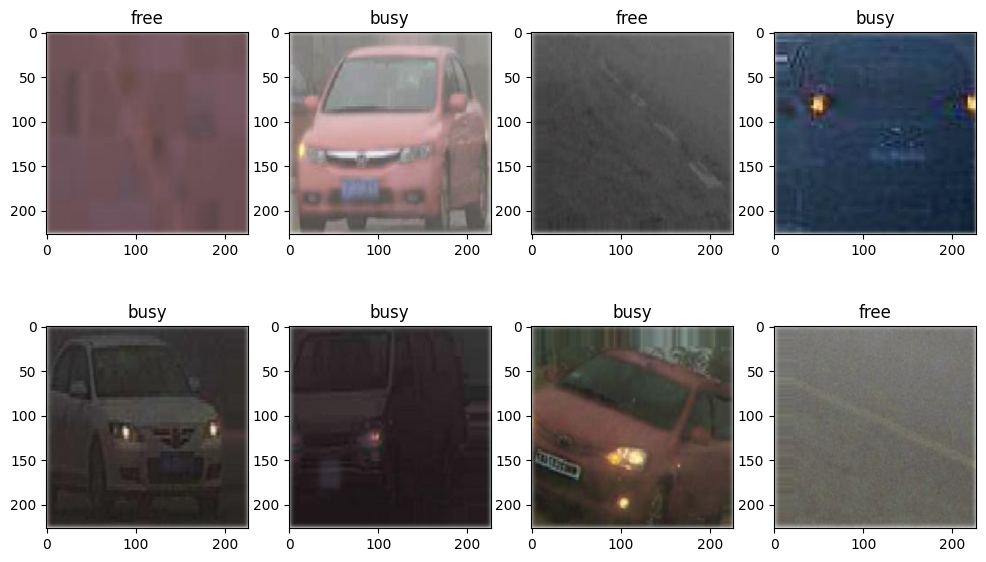

In [58]:
plt.figure(figsize = (12,7))
cate = ['busy', 'free']
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(cate[y_train[ind]])

### 2. Data preprocessing

This task consists of the following steps: 
- Convert integer values into floats
- Normalization
- One-hot encoding 

In [59]:
from keras.utils import to_categorical

In [60]:
def preprocess_data(X, y):
  # convert X from list to array
  X = np.array(X)
  
  # convert integer values of X into floats
  X = X.astype(np.float32)

  # normalization 
  X = X/255.0
  
  # one-hot encoding the labels 
  y = to_categorical(np.array(y))
    
  return X, y
(X_train, y_train) = preprocess_data(X_train, y_train)
(X_test, y_test) = preprocess_data(X_test, y_test)

Visualize some images of the training set after preprocessing: 

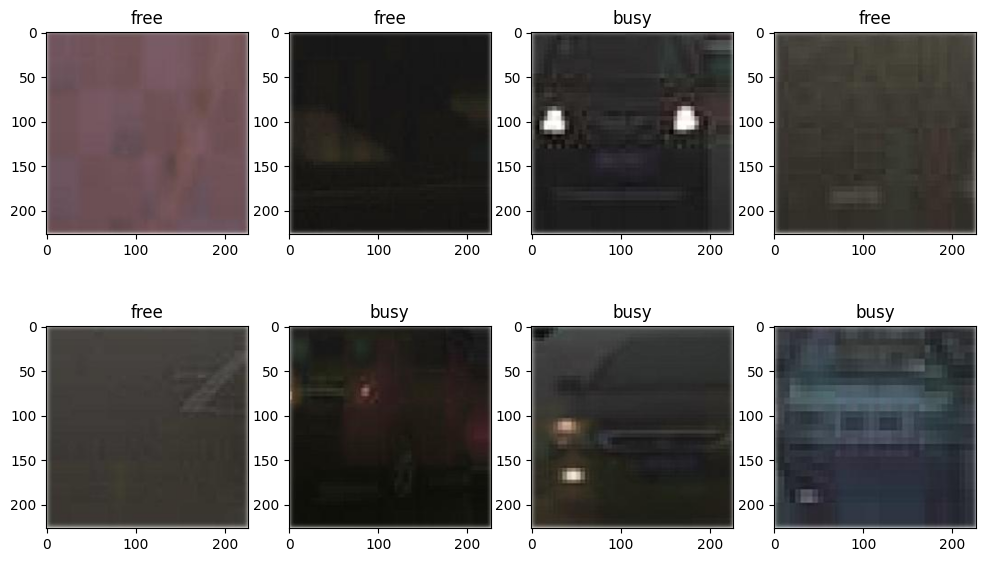

In [63]:
from matplotlib import pyplot as plt
import random
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(cate[np.argmax(y_train[ind])])

### 3. Define the Alexnet model
Remark that the output number in this case is two, which is corresponding to the number of classes 

In [64]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# metric
from keras.metrics import binary_crossentropy
# optimization method (Stochastic Gradient Descent (SGD))
from keras.optimizers import SGD

In [65]:
def Alexnet():
  # Initialize the model
  model = Sequential()

  # layer 1: convolutional layer + max-pooling layer
  model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', activation='relu', input_shape = (227,227,3)))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layer 2: convolutional layer + max-pooling layer 
  model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 3-5: three convolutional layers + 1 max-pooling layer
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 6 - 8: two fully connected hidden layers and one fully connected output layer
  model.add(Flatten())
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation = 'softmax'))

  # compile the model with a loss funciton, a metric and and optimizqation method
  opt = SGD(lr = 0.1)
  model.compile(loss = binary_crossentropy,
                optimizer = opt,
                metrics = ['accuracy'])

  return model

In [66]:
Alexnet_model = Alexnet()
Alexnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 384)       885120    
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 384)      

### 4. Train the model
In this section, we apply data augementation techniques to reduce overfitfing, including rotation the image of 5 degrees, width shift range is 0.1, height shift range is 0.1 and horieontal flip. These techniques can be affected thanks to the ***ImageDataGenerator*** function from the ***keras.preprocessin.image*** module. 

Define the training function: 

In [67]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [68]:
def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
  # Data generator
  datagen = ImageDataGenerator(rotation_range = 5, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
  # iteration on the training set
  it_train = datagen.flow(X_train, y_train, batch_size = batch_size)
  # path to save checkpoint 
  path_cp = os.getcwd() + '/' + 'weights_.hdf5'
  checkpoint_ = ModelCheckpoint(path_cp, monitor = 'loss', save_best_only = True, mode = 'auto')
  steps = X_train.shape[0]//batch_size
  # Fitting the model
  history = model.fit(it_train, epochs = epochs, steps_per_epoch = steps, 
                                validation_data = (X_test, y_test), verbose = 1, 
                                callbacks = checkpoint_)
  # Evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  
  return history, acc

In [69]:
import time
training_start_time= time.time()
train_history, acc = train_model(Alexnet_model, X_train, y_train, X_test, y_test, epochs = 10, batch_size = 32)
training_stop_time=time.time()

Epoch 1/10
106/106 [==============================] - 459s 4s/step - loss: 0.6849 - accuracy: 0.5537 - val_loss: 0.6805 - val_accuracy: 0.7235
Epoch 2/10
106/106 [==============================] - 468s 4s/step - loss: 0.6794 - accuracy: 0.5615 - val_loss: 0.6089 - val_accuracy: 0.7235
Epoch 3/10
106/106 [==============================] - 478s 5s/step - loss: 0.5838 - accuracy: 0.6749 - val_loss: 0.3994 - val_accuracy: 0.8894
Epoch 4/10
106/106 [==============================] - 444s 4s/step - loss: 0.4048 - accuracy: 0.8254 - val_loss: 0.6178 - val_accuracy: 0.6064
Epoch 5/10
106/106 [==============================] - 449s 4s/step - loss: 0.8921 - accuracy: 0.6401 - val_loss: 0.6711 - val_accuracy: 0.6214
Epoch 6/10
106/106 [==============================] - 469s 4s/step - loss: 0.5341 - accuracy: 0.7553 - val_loss: 0.3357 - val_accuracy: 0.8454
Epoch 7/10
106/106 [==============================] - 455s 4s/step - loss: 0.3425 - accuracy: 0.8572 - val_loss: 0.4352 - val_accuracy: 0.7919

In [82]:
print("training_time=",training_stop_time-training_start_time)

training_time= 4728.441804885864


Save the training history and the accuracy

In [70]:
import pandas as pd

In [71]:
# convert the history.history dict to a pandas DataFrame:     
train_hist_df = pd.DataFrame(train_history.history) 

train_dict = {'train_hist': train_hist_df, 
              'acc': acc}
np.save('train_dict.npy', train_dict)         

In [72]:
print(train_hist_df)

       loss  accuracy  val_loss  val_accuracy
0  0.684940  0.553741  0.680467      0.723524
1  0.679392  0.561461  0.608937      0.723524
2  0.583796  0.674881  0.399396      0.889410
3  0.404812  0.825416  0.617758      0.606373
4  0.892129  0.640143  0.671138      0.621368
5  0.534092  0.755344  0.335668      0.845361
6  0.342547  0.857185  0.435182      0.791940
7  0.292235  0.885689  0.346041      0.833177
8  0.244527  0.898753  0.165729      0.932521
9  0.279598  0.885689  0.153015      0.940956


Save the trained Alexnet_model

In [73]:
def plot_accuracy(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['loss'], color = 'blue', label = 'train')
  plt.plot(history.history['val_loss'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

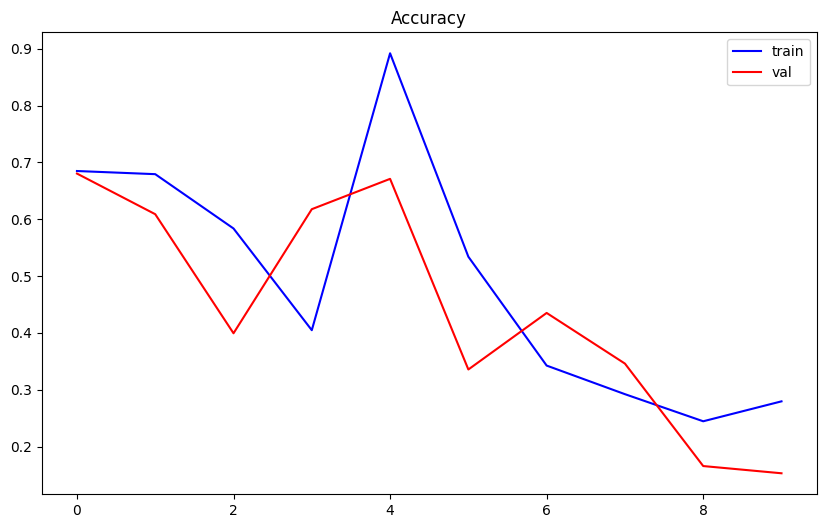

In [74]:
plot_accuracy(train_history)

### 5. Prediction

In [75]:
y_test_pred = []
testing_start_time=time.time()
for i in np.arange(len(X_test)):
  img = X_test[i]
  img = img.reshape(1, 227, 227, 3)
  y_p = Alexnet_model.predict(img)
  y_test_pred.append(y_p)
testing_stop_time=time.time()
print("testing time =", testing_stop_time-testing_start_time)
y_test_pred = np.asarray(y_test_pred)

1/1 [==============================] - 0s 42ms/step
testing time = 118.99486207962036


Determine the confusion matrix 

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

Reverse the true and the predicted labels into the original binary labels (0 and 1) to compute the confusion matrix

In [77]:
y_test_labels = [np.argmax(vect) for vect in y_test]
y_test_pred_labels = [np.argmax(vect) for vect in y_test_pred]

In [78]:
# Assuming y_true and y_pred are your true and predicted labels, respectively
# Assuming y_true and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test_labels, y_test_pred_labels)
print(cm)
# Extract true positives (TP), false positives (FP), false negatives (FN), and true negatives (TN) from the confusion matrix
tp = cm[1, 1]
fp = cm[0, 1]
fn = cm[1, 0]
tn = cm[0, 0]
print(tp,fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Specificity:", specificity,"sensivity=",sensitivity)

[[751  21]
 [ 42 253]]
253 21
Specificity: 0.9727979274611399 sensivity= 0.8576271186440678


In [79]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
precision_1 = precision_score(y_test_labels, y_test_pred_labels)
recall=recall_score(y_test_labels, y_test_pred_labels)
fscore=f1_score(y_test_labels, y_test_pred_labels)
print("precision:",precision_1)
print("recall",recall)
print("f1-Score",fscore)

precision: 0.9233576642335767
recall 0.8576271186440678
f1-Score 0.8892794376098417


In [80]:
# Calculate accuracy score
accuracy = accuracy_score(y_test_labels, y_test_pred_labels)

print("accuracy:",accuracy)

accuracy: 0.9409559512652296


Visualize some images and their predicted classes:

1/1 [==============================] - 0s 39ms/step


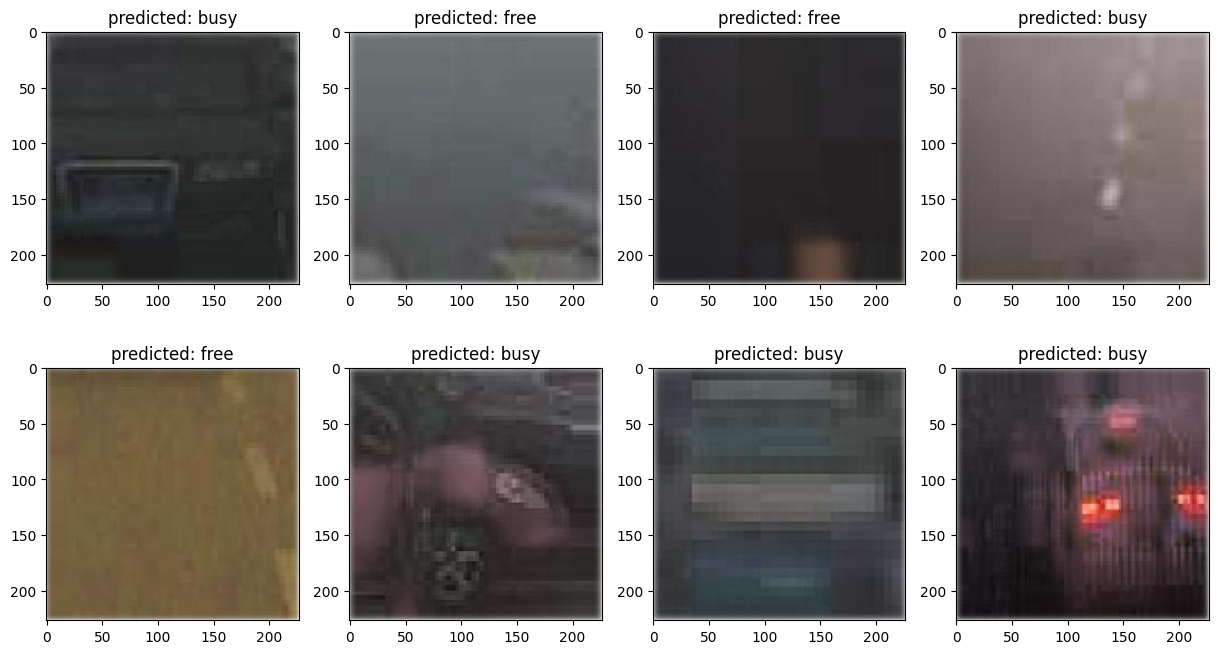

In [81]:
plt.figure(figsize = (15,8))
for i in np.arange(8):
  # take randomly in indice
  ind = random.randint(0, len(X_test))
  img = X_test[ind]
  # resize the image 
  img_rs = img.reshape(1,227,227,3)
  # predict the label of img
  y_pred = Alexnet_model.predict(img_rs)
  # determine the corresponding category
  predicted_cate = cate[np.argmax(y_pred)]
  plt.subplot(240+1+i)
  plt.imshow(img)
  plt.title('predicted: ' + str(predicted_cate))